In [6]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
#Membaca Dataset

df1 = pd.read_csv('dataset_diabetes.csv')
df2 = pd.read_csv('diabetes_uji.csv')

In [8]:
#Proses Data_latih 

dfnew1 = df1.drop(df1.columns[[]], axis=1)
new1 = dfnew1.head()
a1 = dfnew1.shape
print(new1)
print("Total", a1)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur  Hasil
0          8      188     78           0        0  47.9    0.137    43      1
1          7      152     88          44        0  50.0    0.337    36      1
2          2       99     52          15       94  24.6    0.637    21      0
3          1      109     56          21      135  25.2    0.833    23      0
4          2       88     74          19       53  29.0    0.229    22      0
Total (768, 9)


In [9]:
#Proses Data_Uji

dfnew2 = df2.drop(df2.columns[[]], axis=1)
new2 = dfnew2.head()
a2 = dfnew2.shape
print(new2)
print("Total", a2)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur  Hasil
0          6      148     72          35        0  33.6    0.627    50      1
1          1       85     66          29        0  26.6    0.351    31      0
2          8      183     64           0        0  23.3    0.672    32      1
3          1       89     66          23       94  28.1    0.167    21      0
4          0      137     40          35      168  43.1    2.288    33      1
Total (154, 9)


In [10]:
#Penggabungan Data

dfnew3 = dfnew1.append(dfnew2)
new3 = dfnew3.head()
a3 = dfnew3.shape
print(new3)
print(a3)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur  Hasil
0          8      188     78           0        0  47.9    0.137    43      1
1          7      152     88          44        0  50.0    0.337    36      1
2          2       99     52          15       94  24.6    0.637    21      0
3          1      109     56          21      135  25.2    0.833    23      0
4          2       88     74          19       53  29.0    0.229    22      0
(922, 9)


In [11]:
#Pemisahan Variabel Hasil

X = dfnew3.drop(columns=['Hasil'])
a4 = X.head()
print(a4)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur
0          8      188     78           0        0  47.9    0.137    43
1          7      152     88          44        0  50.0    0.337    36
2          2       99     52          15       94  24.6    0.637    21
3          1      109     56          21      135  25.2    0.833    23
4          2       88     74          19       53  29.0    0.229    22


In [12]:
#Hasil Dipisah dan Dibuatkan List sendiri

y = dfnew3['Hasil'].values
y[0:8]

array([1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

C:\Users\ACER\AppData\Local\Temp/ipykernel_24728/1993025347.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dfnew3.corr(), dtype = np.bool)


<AxesSubplot:title={'center':'Korelasi antar Fitur'}>

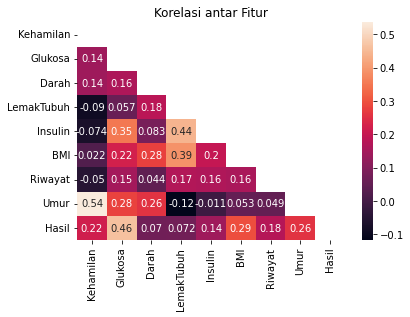

In [13]:
#Heatmap

mask = np.zeros_like(dfnew3.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Korelasi antar Fitur')
sns.heatmap(dfnew3.corr(),
           annot = True,
           mask = mask)

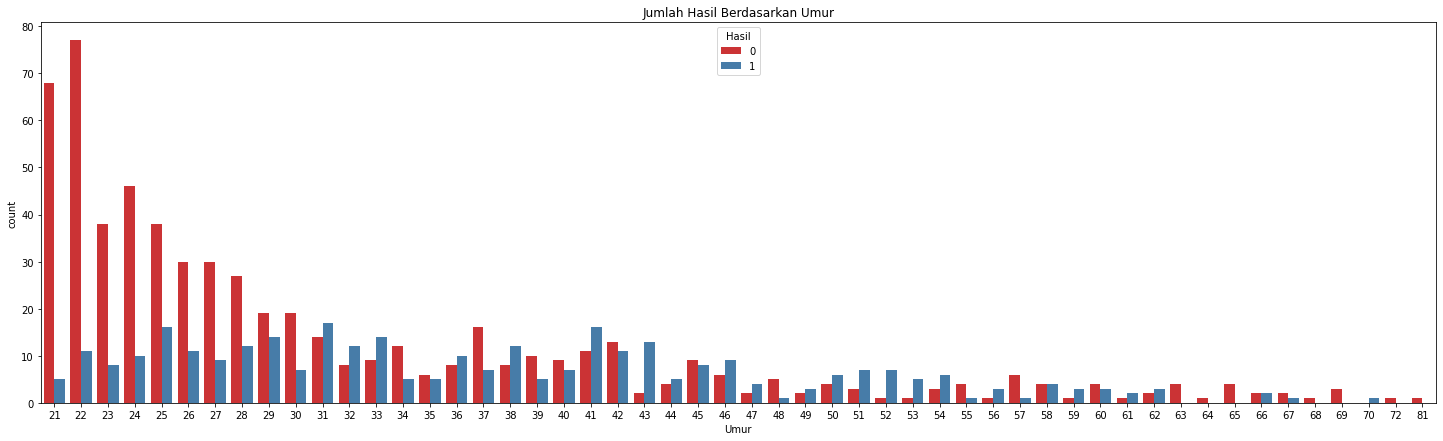

In [14]:
#Menampilkan Grafik

plt.figure(figsize=(25,7))
hasil2 = sns.countplot(x='Umur', hue='Hasil', data=dfnew3, palette='Set1')
plt.title('Jumlah Hasil Berdasarkan Umur')
plt.show(hasil2)

In [15]:
#Memisahkan data Latih dan data Uji

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.168,random_state=1, stratify=y)

In [16]:
print("Jumlah Data Latih:", len(x_train))
print("Jumlah Data Uji:", len(x_test))

Jumlah Data Latih: 767
Jumlah Data Uji: 155


In [17]:
#Membuat KNN

neighbors = 4
knn = KNeighborsClassifier(neighbors)
best_model = knn.fit(x_train, y_train)

In [18]:
#Menampilkan Prediksi

arr = knn.predict(x_test)[0:8]
#print(arr)

score = []
score = knn.score(x_test, y_test)

In [19]:
print("Jumlah K : ", neighbors)
print("Akruasi : ", score * 100, "%")

Jumlah K :  4
Akruasi :  73.54838709677419 %


In [28]:
#Normalisasi Data

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
#Meload model - KNN

classifier = KNeighborsClassifier(n_neighbors=4, p=2, metric = 'euclidean')

In [30]:
#fitting Model

classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [31]:
#Membuat Prediksi

y_pred = classifier.predict(x_test)

In [32]:
#Evaluasi Model

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f1_score(y_test, y_pred) * 100, '%')

[[86 15]
 [26 28]]
57.731958762886606 %


In [33]:
#Hasil Akurasi

print(accuracy_score(y_test, y_pred) * 100, '%')
plt.show()

73.54838709677419 %


In [34]:
error = []
epen = []

#Hasil Kalkulasi Eror untuk nilai K dari 1 sampai 30

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    emen = np.mean(pred_i != y_test)
    epen = error.append(emen)
    
    print (i, emen)

1 0.17419354838709677
2 0.23225806451612904
3 0.25161290322580643
4 0.2645161290322581
5 0.23870967741935484
6 0.23225806451612904
7 0.2064516129032258
8 0.23225806451612904
9 0.23225806451612904
10 0.21935483870967742
11 0.2129032258064516
12 0.2064516129032258
13 0.2064516129032258
14 0.23225806451612904
15 0.23225806451612904
16 0.2903225806451613
17 0.2709677419354839
18 0.2903225806451613
19 0.2967741935483871
20 0.2903225806451613
21 0.2967741935483871
22 0.3096774193548387
23 0.2903225806451613
24 0.27741935483870966
25 0.2709677419354839
26 0.2903225806451613
27 0.2645161290322581
28 0.2645161290322581
29 0.27741935483870966


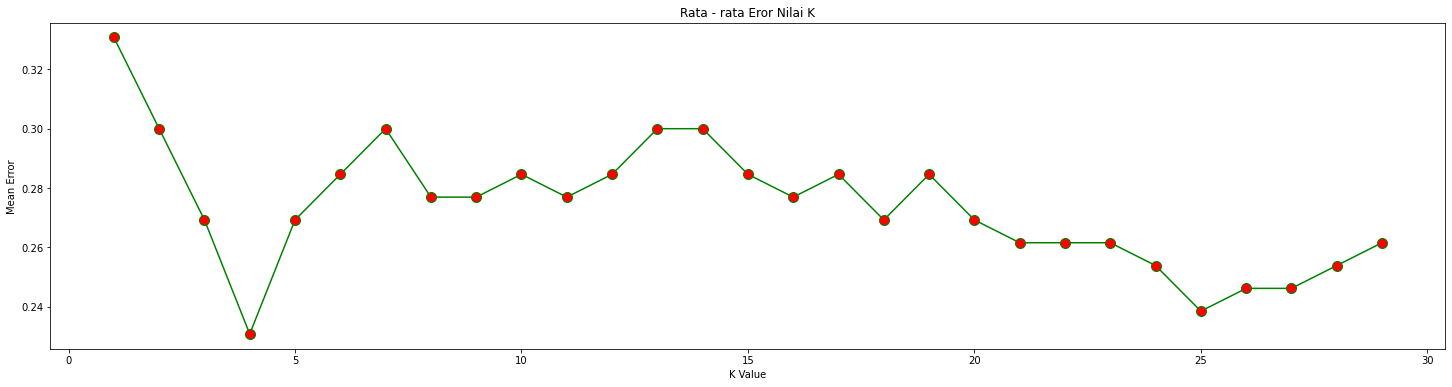

In [35]:
#Menampilkan Grafik Eror Nilai K

plt.figure(figsize=(25, 6))
plt.plot(range(1, 30), error, color='green', linestyle='-', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Rata - rata Eror Nilai K')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [35]:
#Menampilkan Akurasi 

score = []
for n in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    knnscore = knn.score(x_test, y_test)
    sken = score.append(knnscore)
    print(n, knnscore)

1 0.8258064516129032
2 0.7677419354838709
3 0.7483870967741936
4 0.7354838709677419
5 0.7612903225806451
6 0.7677419354838709
7 0.7935483870967742
8 0.7677419354838709
9 0.7677419354838709
10 0.7806451612903226
11 0.7870967741935484
12 0.7935483870967742
13 0.7935483870967742
14 0.7677419354838709
15 0.7677419354838709
16 0.7096774193548387
17 0.7290322580645161
18 0.7096774193548387
19 0.7032258064516129
20 0.7096774193548387
21 0.7032258064516129
22 0.6903225806451613
23 0.7096774193548387
24 0.7225806451612903
25 0.7290322580645161
26 0.7096774193548387
27 0.7354838709677419
28 0.7354838709677419
29 0.7225806451612903
30 0.7032258064516129
31 0.7225806451612903
32 0.7032258064516129
33 0.7096774193548387
34 0.7096774193548387
35 0.7032258064516129
36 0.7032258064516129
37 0.7096774193548387
38 0.6967741935483871
39 0.7032258064516129
40 0.7032258064516129
41 0.7096774193548387
42 0.7161290322580646
43 0.7161290322580646
44 0.6967741935483871
45 0.7032258064516129
46 0.69677419354838

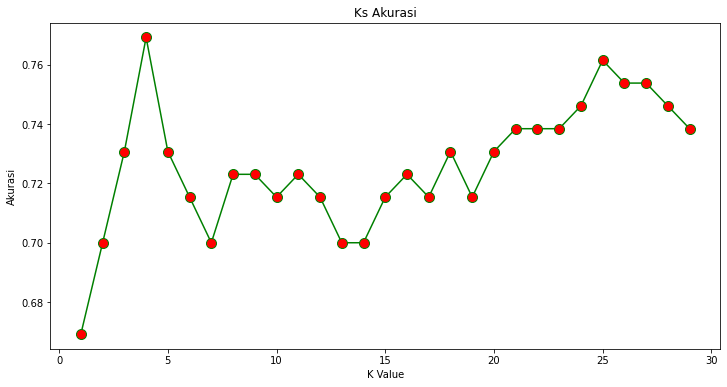

In [37]:
#Menampilkan Grafik  Akruasi tiap Nilai K

plt.figure(figsize=(12,6))
plt.plot(range(1,30), score, color='green', linestyle='-', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Ks Akurasi')
plt.xlabel('K Value')
plt.ylabel('Akurasi')
plt.show()

In [41]:
#Simpan model pakai PICKLE

with open('knn_pickle', 'wb') as r:
    pickle.dump(knn,r)

In [42]:
with open('knn_pickle', 'rb') as r:
    knnp = pickle.load(r)

In [1]:
y_pred = knnp.predict(x_test)

round(accuracy_score(y_test, y_pred),4)

NameError: name 'knnp' is not defined